data from https://www.kaggle.com/harlfoxem/housesalesprediction


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 데이터 준비

In [ ]:
!rm -rf kc_house_data.csv
!wget https://github.com/dhrim/deep_learning_data/raw/master/kc_house_data.csv

--2022-01-19 04:21:28--  https://github.com/dhrim/deep_learning_data/raw/master/kc_house_data.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/deep_learning_data/master/kc_house_data.csv [following]
--2022-01-19 04:21:28--  https://raw.githubusercontent.com/dhrim/deep_learning_data/master/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>]   2.40M  --.-KB/s    in 0.06s   

2022-01-19 04:21:29 (37.5 MB/s) - ‘kc_house_data.csv’ saved [2515206/2515206]



In [ ]:
!head kc_house_data.csv

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
"7129300520","20141013T000000",221900,3,1,1180,5650,"1",0,0,3,7,1180,0,1955,0,"98178",47.5112,-122.257,1340,5650
"6414100192","20141209T000000",538000,3,2.25,2570,7242,"2",0,0,3,7,2170,400,1951,1991,"98125",47.721,-122.319,1690,7639
"5631500400","20150225T000000",180000,2,1,770,10000,"1",0,0,3,6,770,0,1933,0,"98028",47.7379,-122.233,2720,8062
"2487200875","20141209T000000",604000,4,3,1960,5000,"1",0,0,5,7,1050,910,1965,0,"98136",47.5208,-122.393,1360,5000
"1954400510","20150218T000000",510000,3,2,1680,8080,"1",0,0,3,8,1680,0,1987,0,"98074",47.6168,-122.045,1800,7503
"7237550310","20140512T000000",1.225e+006,4,4.5,5420,101930,"1",0,0,3,11,3890,1530,2001,0,"98053",47.6561,-122.005,4760,101930
"1321400060","20140627T000000",257500,3,2.25,1715,6819,"2",0,0,3,7,1715,0,1995,0,"98003",47.3097,-122.327,2238,6819
"2

# 파라매터 설정

In [ ]:
BATCH_SIZE = 32

# 데이터 로딩

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [ ]:
df.price.max()

7700000.0

In [ ]:
print(len(df))

21613


In [ ]:
print(len(df.id.unique()))

21436


# 결측치 처리

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Date 필드 나누기

## year

In [ ]:
df['year'] = df.date.str[:4]
print(df.year)

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Name: year, Length: 21613, dtype: object


In [ ]:
print(df.year.max(), df.year.min())

2015 2014


In [ ]:
df.year = df.year.astype('category')
df['year_code'] = df.year.cat.codes
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,year_code
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,1
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,1


In [ ]:
df = pd.get_dummies(df, columns=['year_code'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,year_code_0,year_code_1
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,1,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,1,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,0,1
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,1,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,0,1


## month

In [ ]:
# '20141013T000000'
df['month'] = df.date.str[4:6]
print(df.month)

0        10
1        12
2        02
3        12
4        02
         ..
21608    05
21609    02
21610    06
21611    01
21612    10
Name: month, Length: 21613, dtype: object


In [ ]:
df.month = df.month.astype('category')
df['month_code'] = df.month.cat.codes
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,year_code_0,year_code_1,month,month_code
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,1,0,10,9
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,1,0,12,11
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,0,1,02,1
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,1,0,12,11
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,0,1,02,1


In [ ]:
df = pd.get_dummies(df, columns=['month_code'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,year_code_0,year_code_1,month,month_code_0,month_code_1,month_code_2,month_code_3,month_code_4,month_code_5,month_code_6,month_code_7,month_code_8,month_code_9,month_code_10,month_code_11
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,1,0,10,0,0,0,0,0,0,0,0,0,1,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,1,0,12,0,0,0,0,0,0,0,0,0,0,0,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,0,1,02,0,1,0,0,0,0,0,0,0,0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,1,0,12,0,0,0,0,0,0,0,0,0,0,0,1
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,0,1,02,0,1,0,0,0,0,0,0,0,0,0,0


# 불필요한 컬럼 삭제

In [ ]:
# df = df.drop(columns=["id", "date", "year", "month"])


In [ ]:
df.drop(columns=["id", "date", "year", "month"], inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_code_0,year_code_1,month_code_0,month_code_1,month_code_2,month_code_3,month_code_4,month_code_5,month_code_6,month_code_7,month_code_8,month_code_9,month_code_10,month_code_11
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0,1,0,1,0,0,0,0,0,0,0,0,0,0


# 이상치 처리

In [ ]:
to_be_removed_columns = []

## 로그화

price


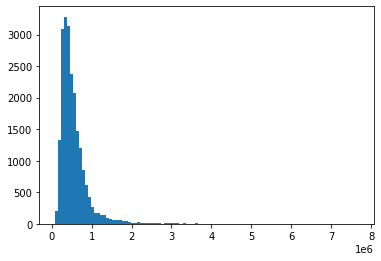

bedrooms


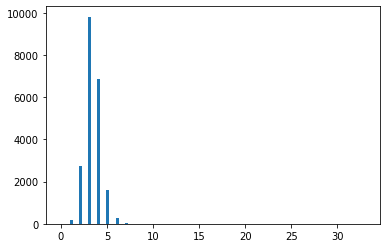

bathrooms


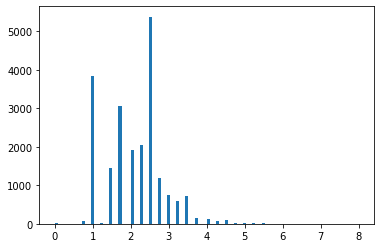

sqft_living


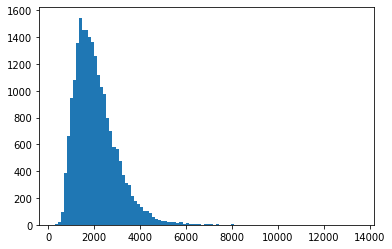

sqft_lot


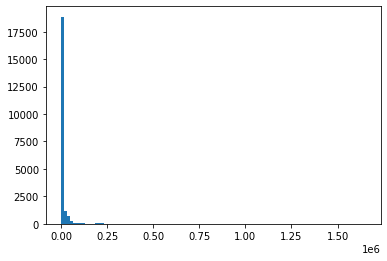

floors


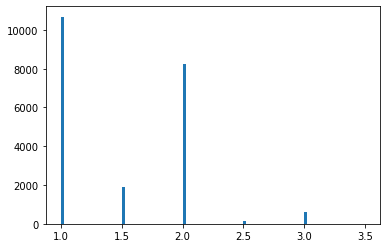

waterfront


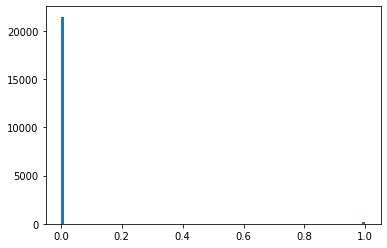

view


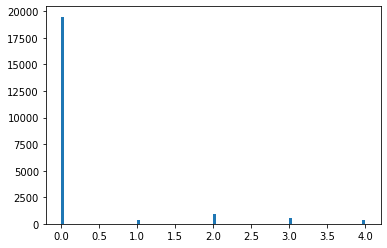

condition


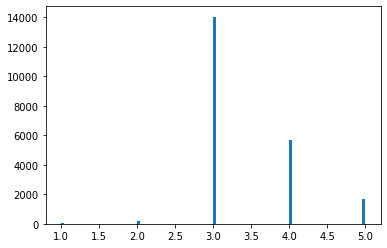

grade


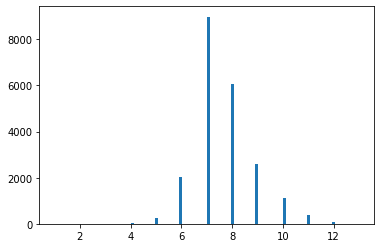

sqft_above


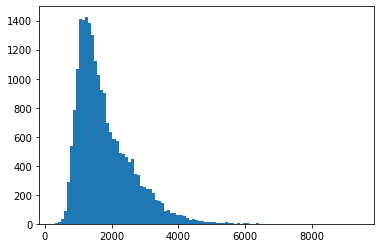

sqft_basement


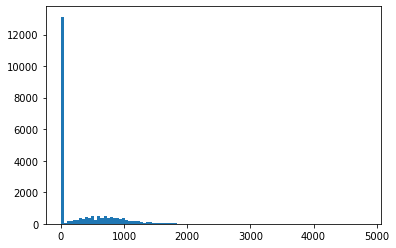

yr_built


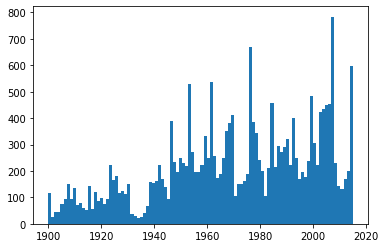

yr_renovated


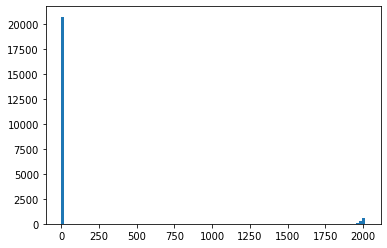

zipcode


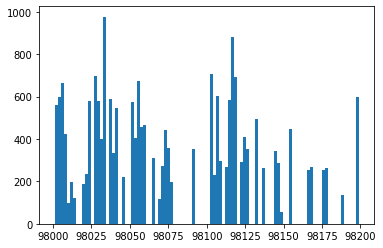

lat


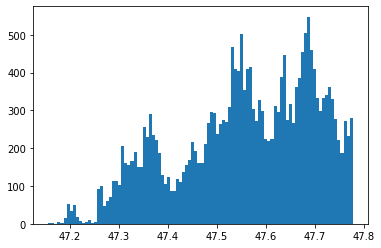

long


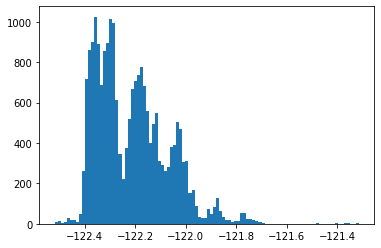

sqft_living15


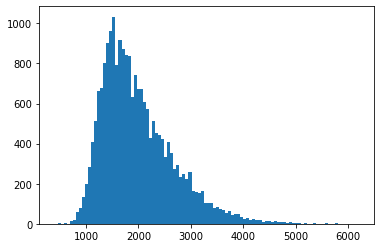

sqft_lot15


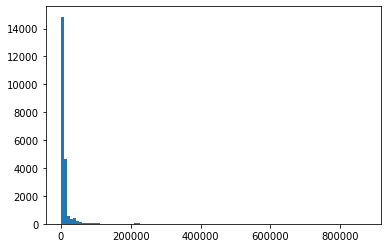

In [ ]:
for i in range(len(df.columns)):
    if "_code_" in df.columns[i]: continue
    print(df.columns[i])
    plt.hist(df.iloc[:,i], bins=100)
    plt.show()



price 75000.0 7700000.0


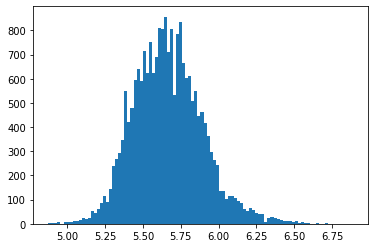

sqft_living 290 13540


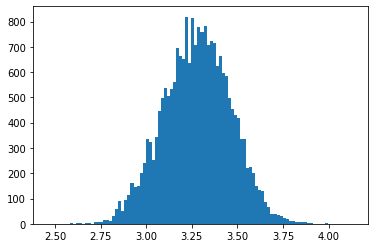

sqft_lot 520 1651359


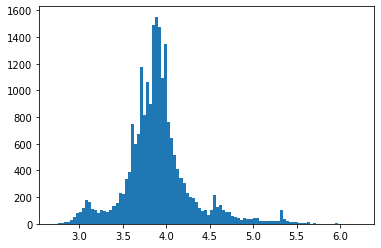

sqft_above 290 9410


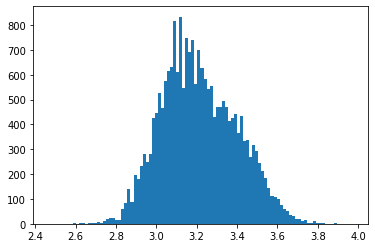

sqft_basement 0 4820


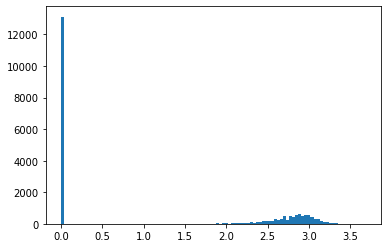

sqft_lot15 651 871200


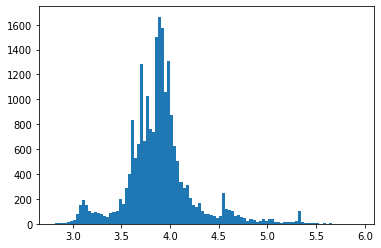

In [ ]:
log_target_column = [ 'price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15' ]

for column_name in log_target_column:
    print(column_name, df[column_name].min(), df[column_name].max())
    plt.hist(np.log10(df[column_name]+1), bins=100)
    plt.show()
    df["log_{}".format(column_name)] = np.log10(df[column_name]+1)

to_be_removed_columns.extend(log_target_column)


## 강제 최대값 설정

bedrooms


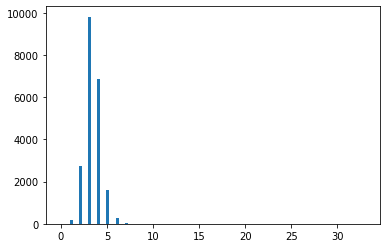

bathrooms


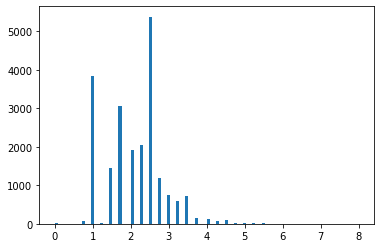

floors


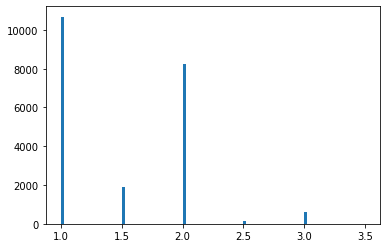

waterfront


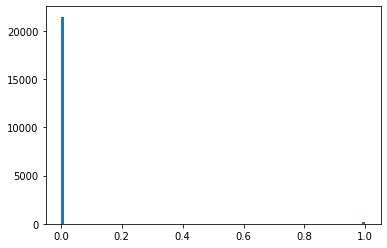

view


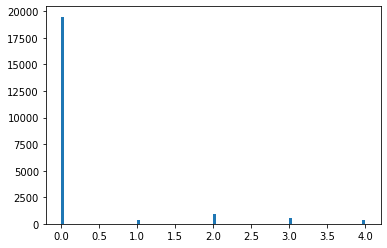

condition


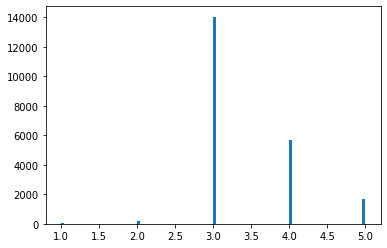

grade


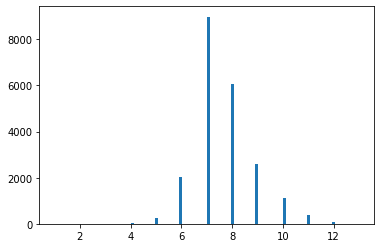

yr_built


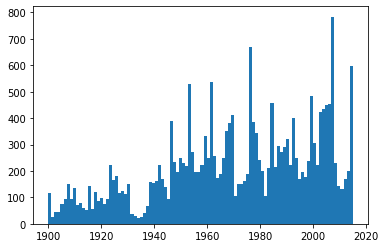

yr_renovated


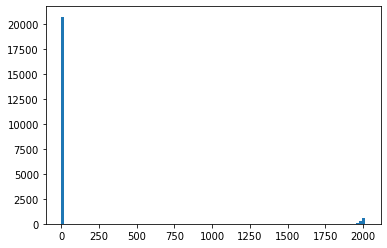

zipcode


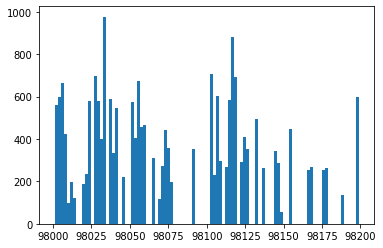

lat


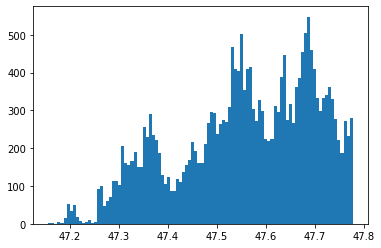

long


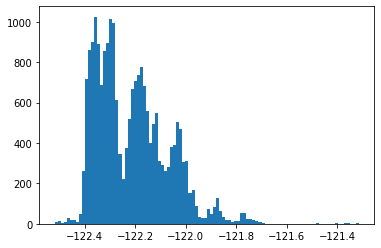

sqft_living15


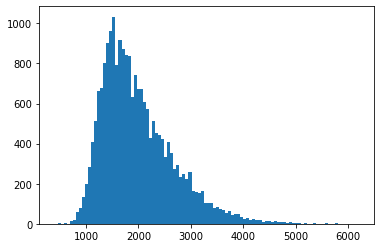

log_price


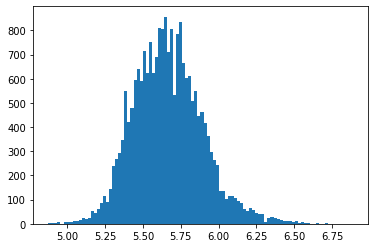

log_sqft_living


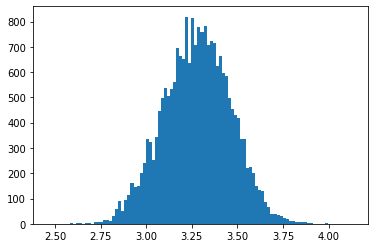

log_sqft_lot


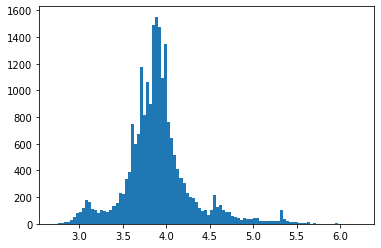

log_sqft_above


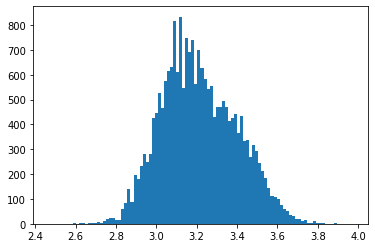

log_sqft_basement


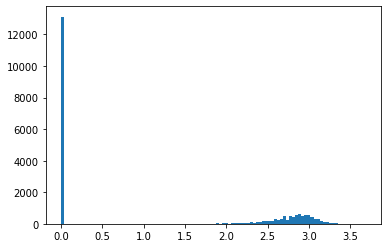

log_sqft_lot15


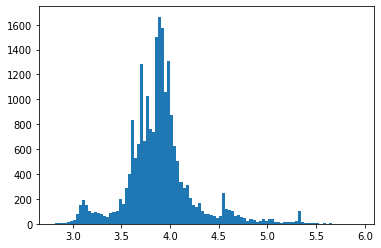

In [ ]:
for i in range(len(df.columns)):
    if "_code_" in df.columns[i]: continue
    if df.columns[i] in to_be_removed_columns: continue
    print(df.columns[i])
    plt.hist(df.iloc[:,i], bins=100)
    plt.show()



bedrooms 10


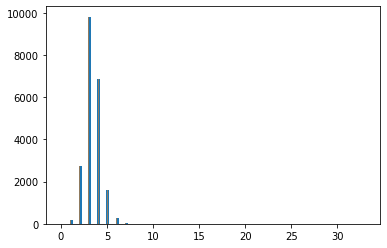

bathrooms 6


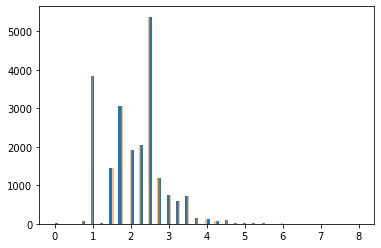

long -121.6


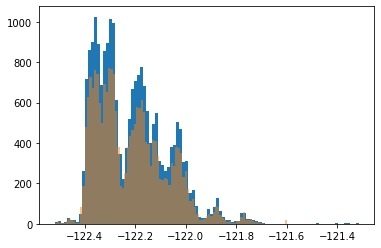

sqft_living15 5000


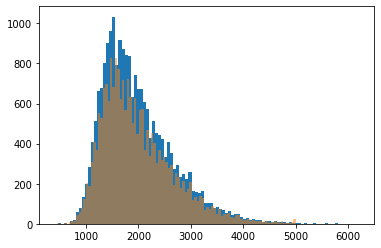

log_sqft_lot 5.5


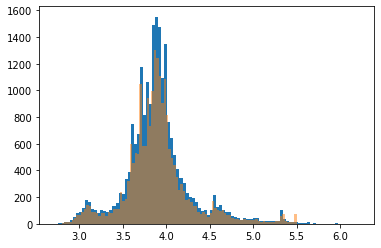

log_sqft_lot15 5.5


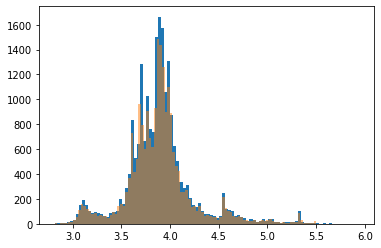

In [ ]:
max_column_values = {
    'bedrooms':10, 
    'bathrooms':6,
    'long':-121.6,
    'sqft_living15':5000,
    'log_sqft_lot':5.5,
    'log_sqft_lot15':5.5
    }
    
for column_name, max_value in max_column_values.items():
    print(column_name, max_value)
    new_column_name = 'max_limied_{}'.format(column_name)
    df[new_column_name] = df[column_name]
    df.loc[df[new_column_name]>max_value, new_column_name] = max_value

    plt.hist(df[column_name], bins=100)
    plt.hist(df[new_column_name], bins=100, alpha=0.5)
    plt.show()

    to_be_removed_columns.append(column_name)

# 불필요 컬럼 삭제

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      21613 non-null  float64
 1   bedrooms                   21613 non-null  int64  
 2   bathrooms                  21613 non-null  float64
 3   sqft_living                21613 non-null  int64  
 4   sqft_lot                   21613 non-null  int64  
 5   floors                     21613 non-null  float64
 6   waterfront                 21613 non-null  int64  
 7   view                       21613 non-null  int64  
 8   condition                  21613 non-null  int64  
 9   grade                      21613 non-null  int64  
 10  sqft_above                 21613 non-null  int64  
 11  sqft_basement              21613 non-null  int64  
 12  yr_built                   21613 non-null  int64  
 13  yr_renovated               21613 non-null  int

In [ ]:
df.drop(columns=to_be_removed_columns, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   floors                     21613 non-null  float64
 1   waterfront                 21613 non-null  int64  
 2   view                       21613 non-null  int64  
 3   condition                  21613 non-null  int64  
 4   grade                      21613 non-null  int64  
 5   yr_built                   21613 non-null  int64  
 6   yr_renovated               21613 non-null  int64  
 7   zipcode                    21613 non-null  int64  
 8   lat                        21613 non-null  float64
 9   year_code_0                21613 non-null  uint8  
 10  year_code_1                21613 non-null  uint8  
 11  month_code_0               21613 non-null  uint8  
 12  month_code_1               21613 non-null  uint8  
 13  month_code_2               21613 non-null  uin

# Shuffle

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,year_code_0,year_code_1,month_code_0,month_code_1,month_code_2,month_code_3,month_code_4,month_code_5,month_code_6,month_code_7,month_code_8,month_code_9,month_code_10,month_code_11,log_price,log_sqft_living,log_sqft_above,log_sqft_basement,max_limied_bedrooms,max_limied_bathrooms,max_limied_long,max_limied_sqft_living15,max_limied_log_sqft_lot,max_limied_log_sqft_lot15
0,1.0,0,0,4,6,1907,0,98117,47.6824,0,1,0,1,0,0,0,0,0,0,0,0,0,0,5.596598,2.991669,2.991669,0.000000,2,1.00,-122.380,1190,3.707655,3.707655
1,2.0,0,0,3,8,1992,0,98014,47.6455,1,0,0,0,0,0,0,0,0,0,0,0,0,1,5.544069,3.269746,3.269746,0.000000,3,2.50,-121.901,2450,4.339988,4.339988
2,1.0,0,0,4,6,1922,0,98136,47.5559,0,1,0,0,1,0,0,0,0,0,0,0,0,0,5.588833,2.903633,2.903633,0.000000,2,1.75,-122.396,1090,3.681332,3.699057
3,1.0,0,0,4,8,1967,0,98005,47.6144,1,0,0,0,0,0,0,1,0,0,0,0,0,0,5.871865,3.431525,3.243286,2.978181,5,2.50,-122.167,2570,4.219349,4.073388
4,1.0,0,0,4,7,1941,0,98108,47.5570,1,0,0,0,0,0,0,1,0,0,0,0,0,0,5.530201,2.978181,2.978181,0.000000,2,1.00,-122.306,1180,3.900640,3.834357


# numpy로 변환

In [ ]:
raw_y = df['log_price'].to_numpy()
raw_x = df.drop(columns=['log_price']).to_numpy()

print(raw_x.shape)
print(raw_y.shape)

(21613, 32)
(21613,)


In [ ]:
print(raw_x[:2])
maxs = np.max(raw_x, axis=0)
mins = np.min(raw_x, axis=0)
print(maxs)
print(mins)

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  4.00000000e+00
   6.00000000e+00  1.90700000e+03  0.00000000e+00  9.81170000e+04
   4.76824000e+01  0.00000000e+00  1.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  2.99166901e+00
   2.99166901e+00  0.00000000e+00  2.00000000e+00  1.00000000e+00
  -1.22380000e+02  1.19000000e+03  3.70765532e+00  3.70765532e+00]
 [ 2.00000000e+00  0.00000000e+00  0.00000000e+00  3.00000000e+00
   8.00000000e+00  1.99200000e+03  0.00000000e+00  9.80140000e+04
   4.76455000e+01  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  3.26974637e+00
   3.26974637e+00  0.00000000e+00  3.00000000e+00  2.50000000e+00
  -1.2190

In [ ]:
normalized_x = (raw_x - mins) / (maxs - mins)
print(normalized_x[:2])

[[0.         0.         0.         0.75       0.41666667 0.06086957
  0.         0.58585859 0.84687148 0.         1.         0.
  1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.31645844
  0.34958009 0.         0.2        0.16666667 0.15125136 0.17191915
  0.35600425 0.33264709]
 [0.4        0.         0.         0.5        0.58333333 0.8
  0.         0.06565657 0.7875181  1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         1.         0.48319571
  0.53376866 0.         0.3        0.41666667 0.67247008 0.44577266
  0.58320352 0.56808668]]


In [ ]:
y_max = np.max(raw_y)
y_min = np.min(raw_y)

normalized_y = (raw_y - y_min) / (y_max - y_min)

In [ ]:
def recover_price(v):
    denormalized = v * (y_max - y_min) + y_min
    deloged = np.power(10, denormalized) - 1
    return deloged.astype(np.int)

# 값 예측

## train/test 나누기

In [ ]:
x = normalized_x
y = normalized_y

In [ ]:
i = int(len(x)*0.8)
train_x, test_x = x[:i], x[i:]
train_y, test_y = y[:i], y[i:]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(17290, 32)
(17290,)
(4323, 32)
(4323,)


## 모델 학습

In [ ]:
train_x.shape[-1]

32

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                330       
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
122/122 [==============================] - 1s 3ms/step - loss: 0.0134 - mape: 24114.9805 - val_loss: 0.0109 - val_mape: 25.2317
Epoch 2/500
122/122 [==============================] - 0s 2ms/step - loss: 0.0083 - mape: 18243.4922 - val_loss: 0.0055 - val_mape: 17.5620
Epoch 3/500
122/122 [===================

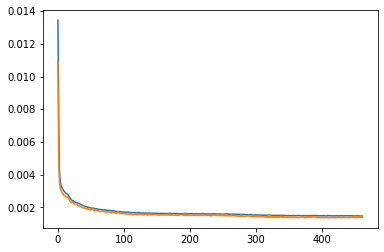

136/136 [==============================] - 0s 2ms/step - loss: 0.0015 - mape: 9.8777
loss= 0.0015230070566758513
mape= 9.877708435058594


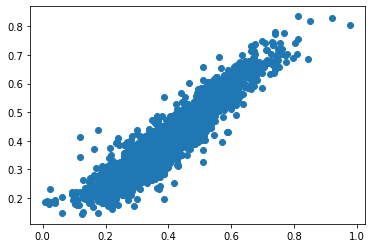

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(train_x.shape[-1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="Adam", loss="mse", metrics=["mape"])
model.summary()

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=50) 
history = model.fit(train_x, train_y, epochs=500, batch_size=128, validation_split=0.1, callbacks=[early_stopping])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

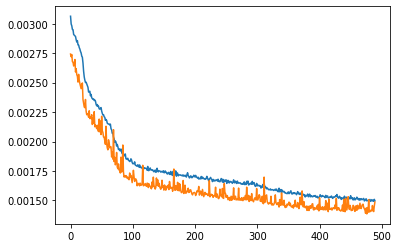

In [ ]:
plt.plot(history.history['loss'][10:])
plt.plot(history.history['val_loss'][10:])
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input, Conv1D, MaxPooling1D, Flatten, Reshape

model = keras.Sequential()
model.add(Input((train_x.shape[-1],)))
model.add(Reshape((train_x.shape[-1],1)))
model.add(Conv1D(10, 5, padding="same"))
model.add(Conv1D(10, 5, padding="same"))
model.add(MaxPooling1D(3))
model.add(Conv1D(10, 5, padding="same"))
model.add(Conv1D(10, 5, padding="same"))
model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="Adam", loss="mse", metrics=["mape"])
model.summary()

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=50) 
history = model.fit(train_x, train_y, epochs=500, batch_size=128, validation_split=0.1, callbacks=[early_stopping])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 32, 1)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 32, 10)            60        
                                                                 
 conv1d_2 (Conv1D)           (None, 32, 10)            510       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 10)           0         
 )                                                               
                                                                 
 conv1d_3 (Conv1D)           (None, 10, 10)            510       
                                                                 
 conv1d_4 (Conv1D)           (None, 10, 10)            510       
                                                      

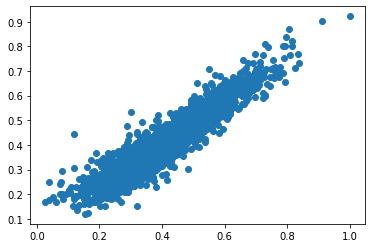

In [ ]:
y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

In [ ]:
y_ = model.predict(test_x).flatten()

predicted_price = recover_price(y_)
true_price = recover_price(test_y)

print(true_price[:5])
print(predicted_price[:5])

[ 554999  952000  474999  599999 1199500]
[ 661625  951219  365542  434461 1245126]


# 분류 예측

## y 랭킹 구하기

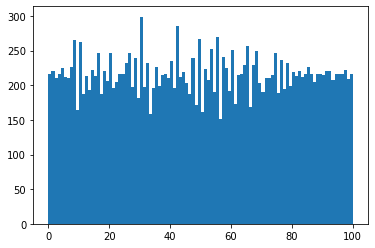

In [ ]:
from scipy import stats
y_ranking = np.array([stats.percentileofscore(y, v, kind='strict') for v in y])
plt.hist(y_ranking, bins=100)
plt.show()

In [ ]:
print(y[:10])
print(y_ranking[:10])
print(y_class[:10])

[0.35871663 0.33260134 0.35485601 0.4955685  0.32570657 0.34313579
 0.43019102 0.47568463 0.3709364  0.46791479]
[39.13385462 30.65284782 38.04654606 82.73261463 28.51061861 34.31730903
 64.32239856 78.06412807 43.54323787 76.12085319]
[3 3 3 8 2 3 6 7 4 7]


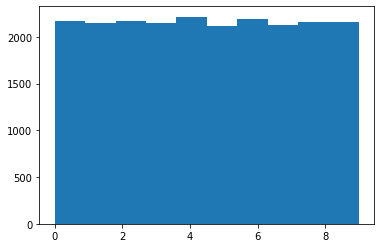

In [ ]:
y_class = (y_ranking/10).astype(np.int)
plt.hist(y_class, bins=10)
plt.show()

## train / test 나누기

In [ ]:
y = y_class

In [ ]:
i = int(len(x)*0.8)
train_x, test_x = x[:i], x[i:]
train_y, test_y = y[:i], y[i:]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(17290, 32)
(17290,)
(4323, 32)
(4323,)


## 모델 학습

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                330       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 550
Trainable params: 550
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
122/122 [==============================] - 3s 4ms/step - loss: 2.3071 - acc: 0.1012 - val_loss: 2.2964 - val_acc: 0.0995
Epoch 2/1000
122/122 [==============================] - 0s 2ms/step - loss: 2.2535 - acc: 0.1506 - val_loss: 2.1943 - val_acc: 0.1920
Epoch 3/1000
122/122 [==============================] 

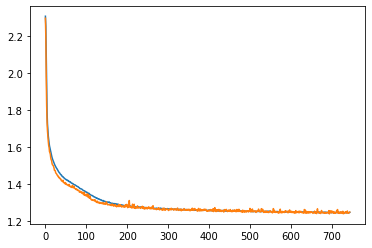

136/136 [==============================] - 0s 2ms/step - loss: 1.2484 - acc: 0.4809
loss= 1.248392105102539
acc= 0.48091602325439453


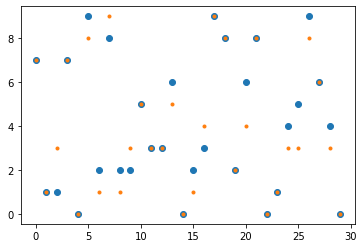

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(train_x.shape[-1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=50) 
history = model.fit(train_x, train_y, epochs=1000, batch_size=128, validation_split=0.1, callbacks=[early_stopping])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y[:30], 'o')
plt.plot(predicted[:30], '.')
plt.show()